In [1]:
%load_ext Cython

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from tqdm import tqdm
from scipy.special import erfc
import boost_histogram as bh

from lmfit.models import *
from lmfit import Model

import inspect

In [3]:
golden_df = pd.read_csv("/Users/tylern/physics_code/build/gr.csv")
golden_df['ratio'] = golden_df['num_of_events'] / golden_df['total_q']
golden_df['run'] = golden_df.run_num*10 + golden_df.file_num
golden_df = golden_df.sort_values(by=['run_num', 'file_num']).reset_index()
golden_df['sum_q'] = np.cumsum(golden_df['total_q'])
golden_df.head()

,index,run_num,file_num,num_of_events,total_q,ratio,run,sum_q
0,568,22848,0,44162,2.623000,16836.447417,228480,2.623000
1,851,22848,11,32629,31.979300,1020.316282,228491,34.602299
2,1135,22853,0,45900,2.793800,16429.236888,228530,37.396099
3,1420,22853,1,46350,5.663800,8183.551333,228531,43.059900
4,1704,22853,2,46418,8.549899,5429.069917,228532,51.609799


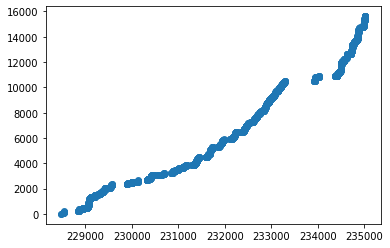

In [4]:
plt.scatter(golden_df['run'], np.cumsum(golden_df['total_q']), alpha=0.9);

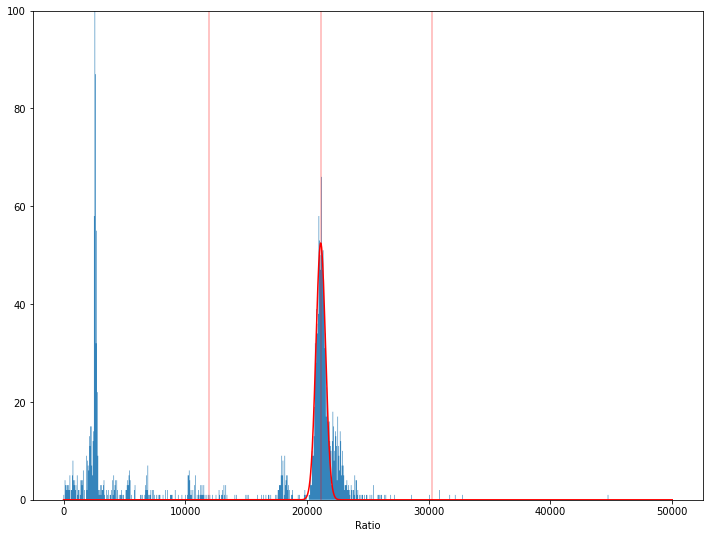

In [5]:
SIGMA = 10
fig = plt.figure(num=None, figsize=(12,9), facecolor='w', edgecolor='k')
bin_heights, bin_borders, _ = plt.hist(golden_df['ratio'], bins=1000, histtype='stepfilled', alpha=0.9, range=[0,50000])

x = bin_borders[:-1]
y = bin_heights

mod = GaussianModel()
pars = mod.guess(y, x=x)
pars['center'].set(value=20000, min=10000, max=30000)
out = mod.fit(y, pars, x=x)

xs=np.linspace(0, 50000, 10000)

plt.plot(xs, out.eval(x=xs), 'r-', label='best fit')

center = out.params['center'].value
fwhm = out.params['fwhm'].value

plt.axvline(x=center, c='r', alpha=0.3)
plt.axvline(x=center+SIGMA*fwhm, c='r', alpha=0.3)
plt.axvline(x=center-SIGMA*fwhm, c='r', alpha=0.3)

plt.ylim([0, 100])
plt.xlabel('Ratio')
plt.show()

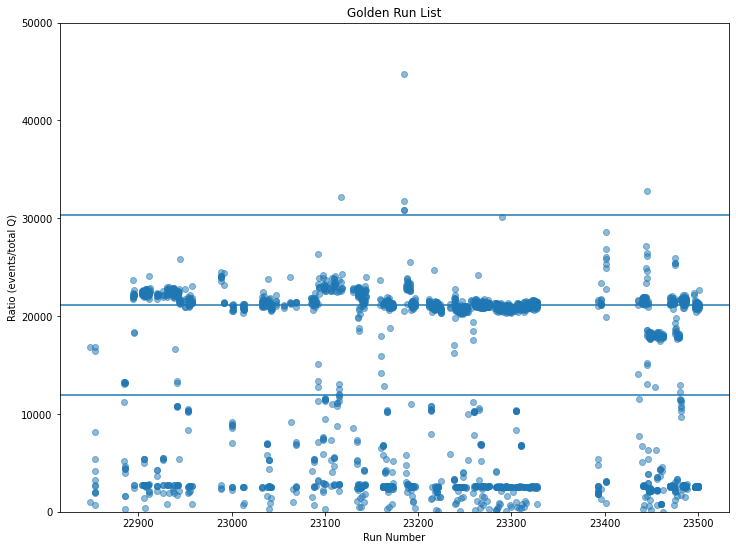

In [6]:
fig = plt.figure(num=None, figsize=(12,9), facecolor='w', edgecolor='k')
plt.scatter(golden_df['run_num'], golden_df['ratio'], alpha=0.5)
plt.axhline(y=center)
plt.axhline(y=center+SIGMA*fwhm)
plt.axhline(y=center-SIGMA*fwhm)
plt.xlabel('Run Number')
plt.title('Golden Run List')
plt.ylabel('Ratio (events/total Q)')
plt.ylim([0, 50000])
plt.show()


In [7]:
after_cut = golden_df[ (golden_df['ratio'] >= center-SIGMA*fwhm) & (golden_df['ratio'] <= center+SIGMA*fwhm)]
after_cut.head()

,index,run_num,file_num,num_of_events,total_q,ratio,run,sum_q
0,568,22848,0,44162,2.623000,16836.447417,228480,2.623000
2,1135,22853,0,45900,2.793800,16429.236888,228530,37.396099
9,852,22853,7,46874,2.781301,16853.260974,228537,114.972901
14,1,22884,0,57591,4.354300,13226.236265,228840,208.378601
15,285,22884,1,57427,4.314600,13309.925942,228841,212.693200


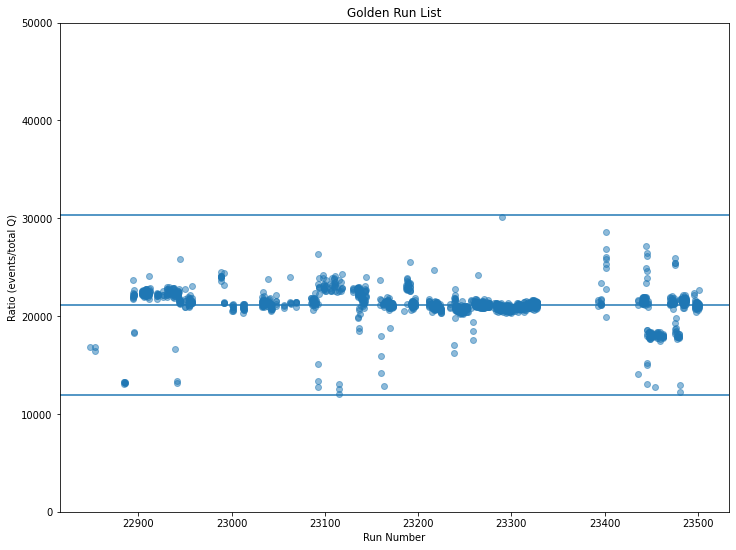

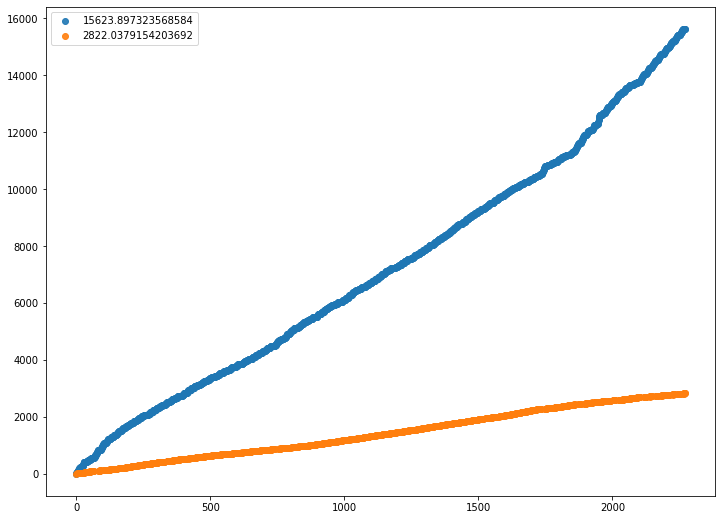

15623.897323568584


In [14]:
fig = plt.figure(num=None, figsize=(12,9), facecolor='w', edgecolor='k')
plt.scatter(after_cut['run_num'], after_cut['ratio'], alpha=0.5)
plt.axhline(y=center)
plt.axhline(y=center+SIGMA*fwhm)
plt.axhline(y=center-SIGMA*fwhm)
plt.xlabel('Run Number')
plt.title('Golden Run List')
plt.ylabel('Ratio (events/total Q)')
plt.ylim([0, 50000])
plt.show()


fig = plt.figure(num=None, figsize=(12,9), facecolor='w', edgecolor='k')
plt.scatter(golden_df.index, np.cumsum(golden_df['total_q']), alpha=0.9, label=f'{np.max(np.cumsum(golden_df.total_q))}')
plt.scatter(after_cut.index, np.cumsum(after_cut['total_q']), alpha=0.9, label=f'{np.max(np.cumsum(after_cut.total_q))}')
plt.legend()

plt.show()

print(np.max(np.cumsum(golden_df.total_q)))

In [52]:
def luminosity():
    Q_tot = 15623.89E-6  # mCE-6 -> C
    l = 5  # cm
    rho = 0.0708  # g/cm3
    Avigadro = 6.022E23  # mol^−1
    qe = 1.602E-19  # C
    MH = 1.007  # g/mol
    conv_cm2_to_fm2 = 1E-39 # From wolfram alpha

    return conv_cm2_to_fm2*(Q_tot*l*rho*Avigadro)/(qe*MH)

In [53]:
luminosity()

20.646251033849197